# PCA (Principal Component Analysis)
Unsupervised Learning Technique
Generally used for dimensionality reduction
Also useful in applications such as
visualization of high-dimensional data,
noise filtering
feature extraction and feature engineering
PCA performs linear dimensionality reduction using SVD (Singular Value Decomposition) of the data to project it to a lower dimensional space. 

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import datasets

In [2]:
#Load iris data from sklearn.dataset module
iris = datasets.load_iris()
X = iris.data
y = iris.target
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
iris_species = ["Setosa", "Versicolour", "Virginica"]

dataset = pd.DataFrame(X, columns=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


A scatter plot between the sepal length and the sepal width is plotted to visualise the iris dataset.

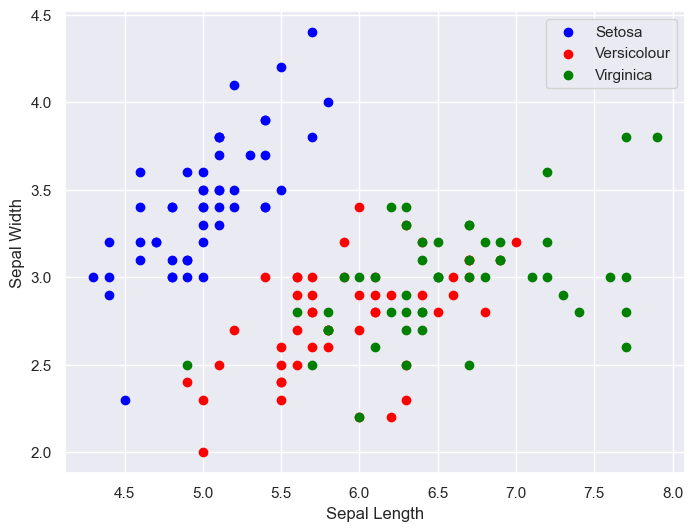

In [4]:
colors = ['blue', 'red', 'green']
fig = plt.figure(figsize = (8,6))
for i in range(len(colors)):
    px = X[:,0][y==i]
    py = X[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
plt.close(fig)

We see that the separation between the blue dots(setosa) and red(versicolor) and green dots(virginica) is quite clear, while separating red dots from green dots seems a very difficult task given the two features available.

We visualise the data on different features: petal width and petal length.

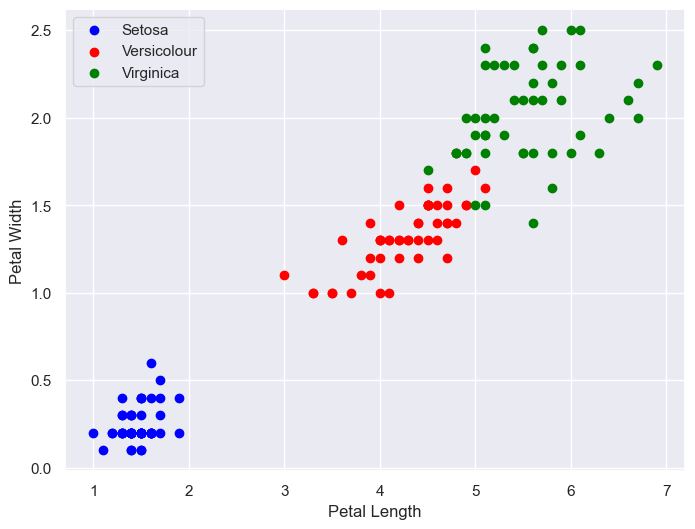

In [5]:
fig = plt.figure(figsize = (8,6))
for i in range(len(colors)):
    px = X[:,2][y==i]
    py = X[:,3][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()
plt.close(fig)

In this case, the decision boundary between the green and the red dots can be easily determined.

# Dimensionality Reduction
We will use PCA (Principal Component Analysis) for dimensionality reduction.

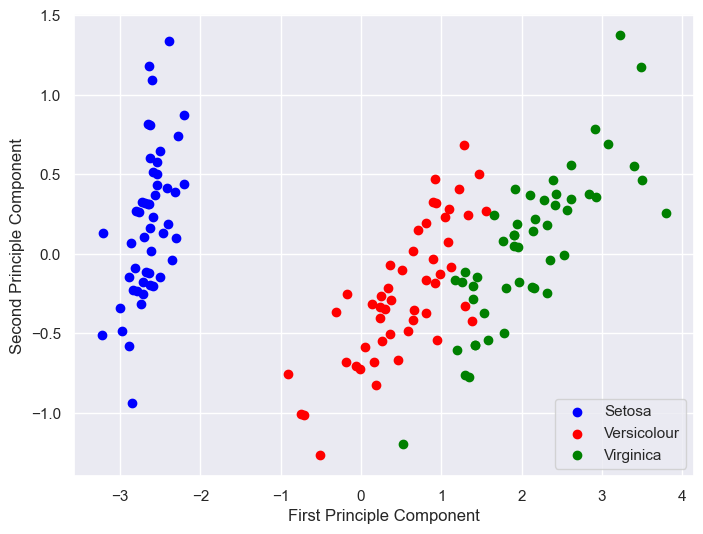

In [6]:
# Visualizing the principal components using PCA

# Linear PCA
est = PCA(n_components=2)
x_pca = est.fit_transform(X)
#print(x_pca.shape)
plt.figure(figsize=[8, 6])
for i in range(len(colors)):
    px = x_pca[:,0][y==i]
    py = x_pca[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

# Kernel PCA

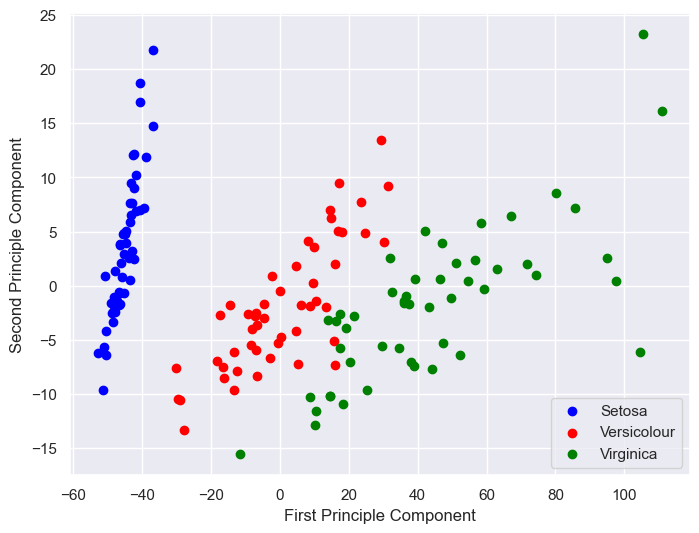

In [7]:
# Visualizing the principal components using different Kernel PCA

# Polynomial Kernel
est = KernelPCA(n_components=2, kernel='poly', degree=3)
x_pca = est.fit_transform(X)

plt.figure(figsize=[8, 6])
for i in range(len(colors)):
    px = x_pca[:,0][y==i]
    py = x_pca[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

# Gaussian Kernel

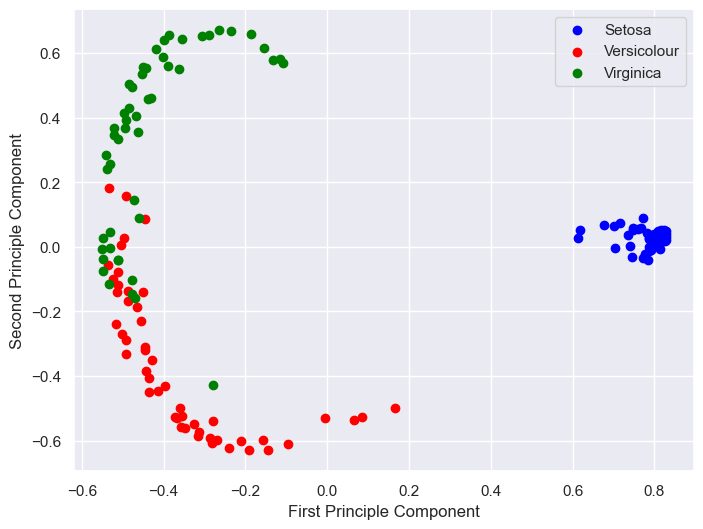

In [8]:
# Gaussian Kernel
est = KernelPCA(n_components=2, kernel='rbf')
x_pca = est.fit_transform(X)

plt.figure(figsize=[8, 6])
for i in range(len(colors)):
    px = x_pca[:,0][y==i]
    py = x_pca[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

Automatically created module for IPython interactive environment


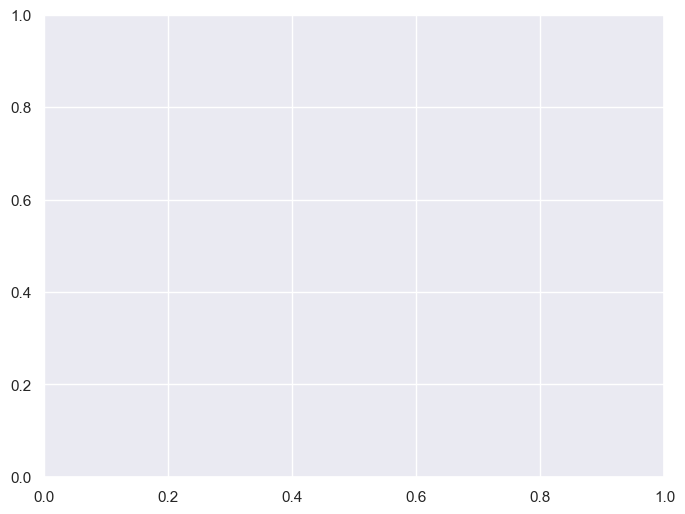

In [9]:
# PCA in 3 dimensions

print(__doc__)

# Code taken from: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
# Code source: Gaël Varoquaux
# License: BSD 3 clause

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize=(8,6))
plt.clf()  # Clear current figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla() # Clear current axes
pca = PCA(n_components=3)
x_pca3D = pca.fit_transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(x_pca3D[y == label, 0].mean(),
              x_pca3D[y == label, 1].mean() + 1.5,
              x_pca3D[y == label, 2].mean(),
              name, horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='black', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y_new = np.choose(y, [0, 1, 2]).astype(float)
ax.scatter(x_pca3D[:, 0], x_pca3D[:, 1], x_pca3D[:, 2], c=y_new, cmap='brg',
           edgecolor='k')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.show()

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


C:\Users\Monir\AppData\Local\Temp\ipykernel_3964\2240274380.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Accent', 10))


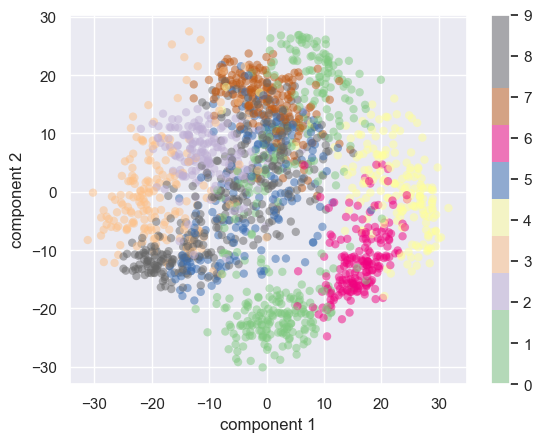

In [12]:
#plot the dataset
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

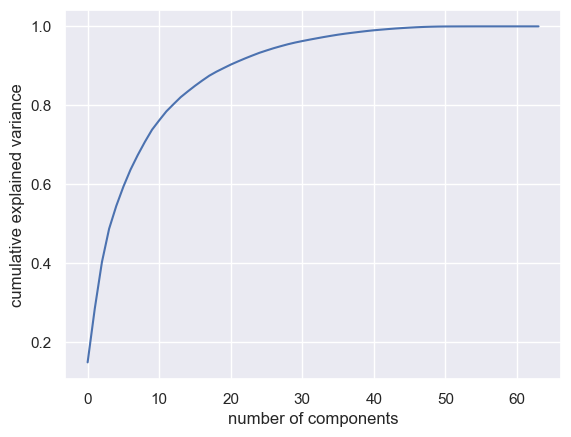

In [13]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

# PCA as Noise Filtering
PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:

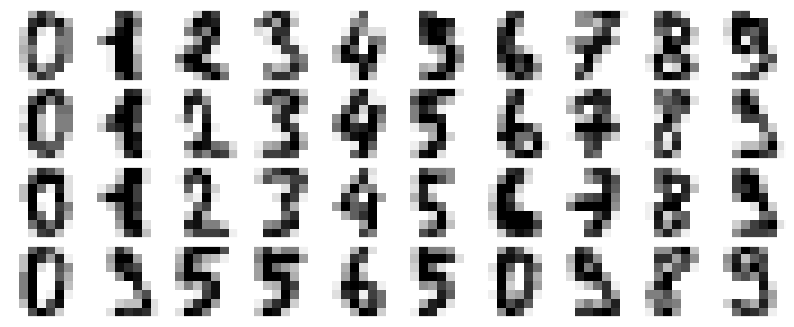

In [14]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

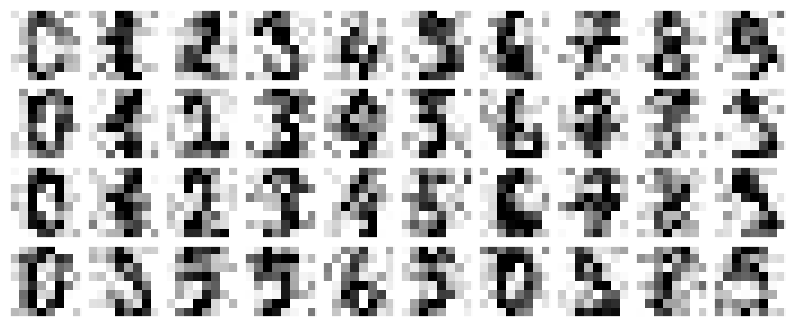

In [15]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [16]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

np.int64(12)

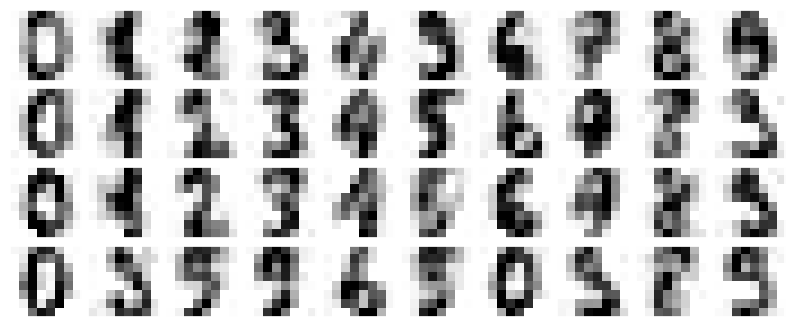

In [17]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)